# Are 50$^\circ$ days within historical norms for weather in Chicago?

The goal of this notebook is to determine the context for the forecast for 50$^\circ$ weather in Chicago this coming weekend.  I have the hourly weather data going back to 1979 for my zipcode, 60608, Chicago's Lower West Side.  Some summary stats is all we need.

In [3]:
dat <- read.csv(file = getObjectStorageFileWithCredentials_e838995faea74efb9e5d3d12f14ee83b("WeatherForecasting", "weather60608_1979_2017.csv"))
dim(dat)
head(dat)

Loading required package: httr
Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:SparkR’:

    base64



[1] 333144     20

dateHrGmt,dateHrLwt,surfaceTemperatureFahrenheit,surfaceDewpointTemperatureFahrenheit,surfaceWetBulbTemperatureFahrenheit,relativeHumidityPercent,surfaceAirPressureMillibars,windSpeedMph,windDirectionDegrees,cloudCoveragePercent,precipitationPreviousHourInches,directNormalIrradianceWsqm,downwardSolarRadiationWsqm,diffuseHorizontalRadiationWsqm,windChillTemperatureFahrenheit,apparentTemperatureFahrenheit,snowfallInches,heatIndexFahrenheit,mslPressureMillibars,surfaceWindGustsMph
01/08/1979 00:00:00,01/07/1979 18:00:00,5.2,4.8,5.1,99,999,12.9,302,86,0,0,0,0,-11.6,-11.6,0,5.2,1025,30.6
01/08/1979 01:00:00,01/07/1979 19:00:00,3.5,3.2,3.5,99,997,13.2,300,61,0,0,0,0,-13.8,-13.8,0,3.5,1024,33.0
01/08/1979 02:00:00,01/07/1979 20:00:00,2.0,1.8,2.0,99,998,12.4,292,54,0,0,0,0,-15.2,-15.2,0,2.0,1024,33.4
01/08/1979 03:00:00,01/07/1979 21:00:00,0.8,0.5,0.7,99,997,12.4,294,74,0,0,0,0,-16.8,-16.8,0,0.8,1024,33.0
01/08/1979 04:00:00,01/07/1979 22:00:00,-0.3,-0.6,-0.4,99,998,12.1,292,69,0,0,0,0,-18.0,-18.0,0,-0.3,1024,32.6
01/08/1979 05:00:00,01/07/1979 23:00:00,-1.3,-1.5,-1.3,99,998,12.2,292,79,0,0,0,0,-19.3,-19.3,0,-1.3,1024,32.1


In [4]:
head(dat[, c("dateHrLwt", "surfaceTemperatureFahrenheit")])

dateHrLwt,surfaceTemperatureFahrenheit
01/07/1979 18:00:00,5.2
01/07/1979 19:00:00,3.5
01/07/1979 20:00:00,2.0
01/07/1979 21:00:00,0.8
01/07/1979 22:00:00,-0.3
01/07/1979 23:00:00,-1.3


In [5]:
# install.packages("lubridate")
library(lubridate)


Attaching package: ‘lubridate’

The following objects are masked from ‘package:SparkR’:

    hour, minute, month, quarter, second, year

The following object is masked from ‘package:base’:

    date



Make dateHrGmt readable by lubridate

In [6]:
datetime <- lubridate::mdy_hms(as.character(dat$dateHrGmt))

Determine percentiles of January temperature and percentage of +50 degree hours

0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
-22.1,-7.5,-3.2,-0.5,1,2.3,3.5,4.5,5.5,6.5,...,37.6,38.1,38.9,39.7,40.6,41.8,43.4,45.7,48.7,59.4


pct.above.50 
       0.008

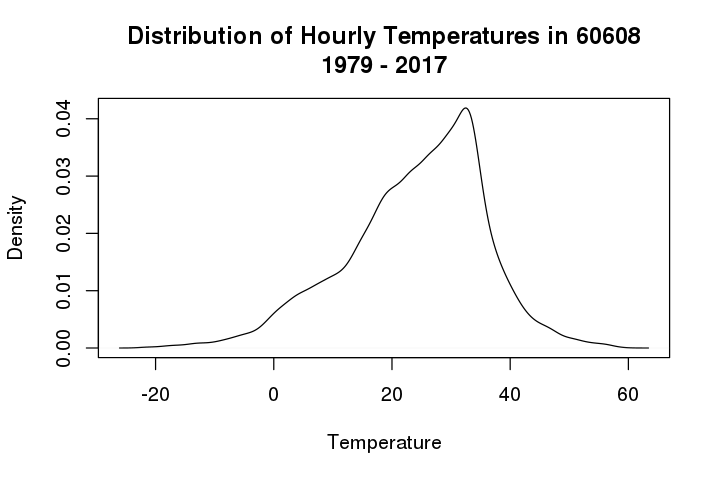

In [13]:
jan.ind <- which(month(datetime) == 1)
t(quantile(dat[jan.ind, "surfaceTemperatureFahrenheit"], seq(0, 1, .01)))

# Percentage of hours above 50
pct.above.50 <- round(length(which(dat[jan.ind, "surfaceTemperatureFahrenheit"] > 50))/length(jan.ind), 3)
names(pct.above.50) <- "pct.above.50"
pct.above.50

# Plot
options(repr.plot.width=6, repr.plot.height=4)
plot(density(dat[jan.ind, "surfaceTemperatureFahrenheit"]), xlab = "Temperature", main = "Distribution of Hourly Temperatures in 60608\n1979 - 2017")

In [8]:
FiftyplusYearCount <- table(year(datetime[jan.ind[which(dat[jan.ind, "surfaceTemperatureFahrenheit"] > 50)]]))

In [9]:
FPYC <- data.frame(Year = 1979:2017, Count = 0)
FPYC[which(1979:2017 %in% as.numeric(names(FiftyplusYearCount))), "Count"] <- FiftyplusYearCount

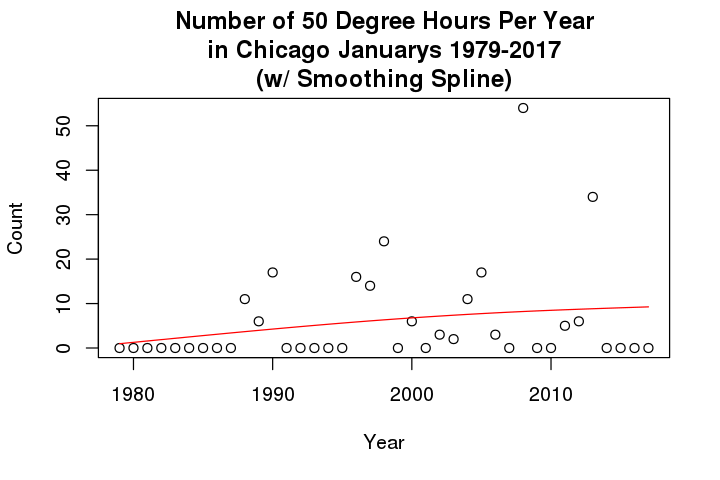

In [14]:
options(repr.plot.width=6, repr.plot.height=4)
plot(FPYC, main = "Number of 50 Degree Hours Per Year\nin Chicago Januarys 1979-2017\n(w/ Smoothing Spline)")
lines(smooth.spline(FPYC), col = 2)

# Conclusion

In summary, by going back 38 years, we see the the extremely warm weather in the 60608 is on the rise in January.
10 hours of 50$^\circ$ weather in January is now the norm, not the exception.